# Linear regression practical
By Dominic Waithe 2018

In [42]:
%pylab inline
import numpy as np
#This is a simple numpy implementation of the correlation function.
def correlation(data1, data2):
    "data1 & data2 should be numpy arrays."
    mean1 = data1.mean() 
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()
    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr


Populating the interactive namespace from numpy and matplotlib


#### This is the analytical solution for solving simple linear regression.

('b0', 5.0)
('b1', 0.5)


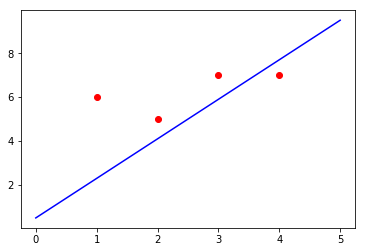

In [10]:
#Make some data.
data = np.array([[1,6],[2,5],[3,7],[4,7]])
n = data.shape[0]
x = data[:,0]
y = data[:,1]
#Using the expanded equations from the notes.
# equation (3).
b0 = (np.average(y)*(np.sum(x**2))-np.average(x)*np.sum(x*y))/(np.sum(x**2)-n*np.average(x)**2)
print('b0',b0) 
# equation (2).
b1 = ((np.sum(x*y))-n*np.average(x)*np.average(y))/(np.sum(x**2)-n*np.average(x)**2)
print('b1',b1)
#visualisation
xx = np.linspace(0,5,2)
yy = np.array(betaHat[0]+ betaHat[1] * xx)
plot(xx,yy.T,color='b')
scatter(data[:,0], data[:,1],color='r')

#You could do it for higher dimension input data (i.e. 3D or nD data, but the equations get very long!!!!)

#### This is the generalisable solution for solving linear regression.

('b0', array([ 5.]))
('b1', array([ 0.5]))


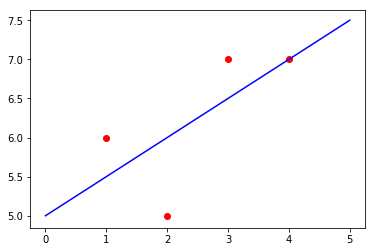

In [189]:
#(X'X) This is equivalent to the matrix [[n,np.sum(x)],[np.sum(x),np.sum(x**2)]]
X = np.array([np.ones(n),data[:,0]]).T
XtX = X.T.dot(X)
#(X'Y) This is equivalent to the matrix [[np.sum(y)],[np.sum(x*y)]]
y = np.array(data[:,1]).reshape(-1,1)
XtY = X.T.dot(y)

betaHat = np.linalg.solve(XtX,XtY)#This does the hard work! 
#Above can involve a lot of memory if the arrays are very long and high in dimension.
print('b0',betaHat[0])
print('b1',betaHat[1])
#Visualisation.
xx = np.linspace(0,5,2)
yy = np.array(betaHat[0]+ betaHat[1] * xx)
plot(xx,yy.T,color='b')
scatter(data[:,0], data[:,1],color='r')
#Should give the same answer as above :-).

In [15]:
#TODO. 
#Download some data and fit it using the linear regression methods above.
#e.g. sklearn.datasets.load_diabetes(return_X_y=False)
#import sklearn.datasets
#a =sklearn.datasets.load_diabetes(return_X_y=False)
#Just plot two variables at a time.
#calculate the correlation for each of the independent variables with respect to the dependent.
#correlation(a['data'][:,num],a['target']
#Find the most correlated and fit a line to it.
#measure the correlation
#Make a figure, label the axis, and give it a title.

('b0', array([ 5.08810573]))
('b1', array([ 0.51982379]))
('b2', array([-0.02202643]))


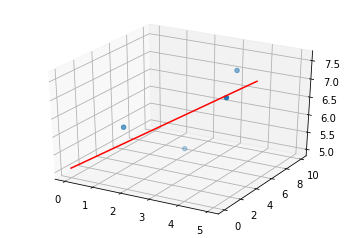

In [11]:
from mpl_toolkits.mplot3d import Axes3D
#### This is the generalisable solution for solving linear regression.
###In this case optimised for 3-D data.

#We reformat our data a little bit. Notice where the extra has gone.
x_nD = np.array([[1,2,3,4],[3,7,10,5]])
y = np.array([6,5,7,7])
n = data.shape[0]

#(X'X) This is equivalent to the matrix [[n,np.sum(x)],[np.sum(x),np.sum(x**2)]]
X = np.array([np.ones(n),x_nD[0],x_nD[1]]).T
XtX = X.T.dot(X)
#(X'Y) This is equivalent to the matrix [[np.sum(y)],[np.sum(x*y)]]
y = np.array(y).reshape(-1,1)
XtY = X.T.dot(y)
betaHat = np.linalg.solve(XtX,XtY)#This does the hard work! 
#Above can involve a lot of memory if the arrays are very long and high in dimension.

#print the paramters of our line.
print('b0',betaHat[0])
print('b1',betaHat[1])
print('b2',betaHat[2])

fig = figure()
ax = fig.add_subplot(111, projection='3d')
#ax = Axes3D(fig)
ax.scatter(x_nD[0], x_nD[1], y, zdir='z', s=20, c=None, depthshade=True)
xs = np.linspace(0,5,2)
ys = np.linspace(0,5,2)
yy = np.array(betaHat[0]+ betaHat[1] * xs + betaHat[2]*ys)
ax.plot(xs, ys,yy,'red')

In [245]:
#TODO:

#Can you see how the above code could be changed to make it work in 4-D or more?
#Try and create code which works for your diabetes data. 
#You won't be able to visualise the output as a graph.


#print the parameters of your line.
print('b0',betaHat[0])
print('b1',betaHat[1])
print('b2',betaHat[2])
print('b3',betaHat[3])
print('b4',betaHat[4])
print('b5',betaHat[5])
#How can you check if your method is working correctly?

('b0', array([ 5.20482213]))
('b1', array([ 0.08964246]))
('b2', array([-0.07517007]))
('b3', array([-0.05398251]))
('b4', array([ 0.04588548]))
('b5', array([-0.02088462]))


### Stochastic gradient descent as an alternative optimisation.

(0.051545143127441406, 'ms SGD iterative method.')
(0.0064239501953125, 'ms analytical least squares method.')
('b0', 0.49553624398388385, 'iterative')
('b1', 1.7975458555933279, 'iterative')
('b0', 0.49902314952507387, 'analytical')
('b1', 1.799990291879632, 'analytical')


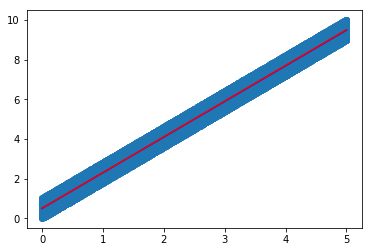

In [16]:
from sklearn.linear_model import SGDRegressor
import time
#How about if we add lots of data now.
x_nD = np.array(np.random.random((100000,2)))
y = x_nD[:,0]*9.0+x_nD[:,1]
SGDRegressor(loss="squared_loss")
clf = SGDRegressor()

X0 = x_nD[:,0].reshape(1,-1)*5.0  # SGDRegressor is very particular on input "X" and insists on a true matrix 
y0 = y.tolist()

t1 = time.time()
clf.fit(X0.T,y0)#Stochastic Gradient Descent approach.
t0 = time.time()
print(t0-t1,"ms SGD iterative method.")

n = x_nD.shape[0]

t1 = time.time()
#(X'X) This is equivalent to the matrix [[n,np.sum(x)],[np.sum(x),np.sum(x**2)]]
X = np.array([np.ones(n),x_nD[:,0]*5.0]).T
XtX = X.T.dot(X)
#(X'Y) This is equivalent to the matrix [[np.sum(y)],[np.sum(x*y)]]
y = np.array(y0).reshape(-1,1)
XtY = X.T.dot(y)
betaHat = np.linalg.solve(XtX,XtY)#Analytical linear algebra approach.
t0 = time.time()
print(t0-t1,"ms analytical least squares method.")
#Above can involve a lot of memory if the arrays are very long and high in dimension.
#At this size of data however, at low dimension it is very fast compared SGD.


print('b0',clf.intercept_[0],'iterative')
print('b1',clf.coef_[0],'iterative')
print('b0',betaHat[0][0],'analytical')
print('b1',betaHat[1][0],'analytical')


plot(X0[0],y0,'o')
xx = np.linspace(0,5,2)
yy = np.array(clf.intercept_+ clf.coef_[0] * xx)
plot(xx,yy.T,color='b')
yy = np.array(betaHat[0]+ betaHat[1] * xx)
plot(xx,yy.T,color='r')
###Which is faster???



In [ ]:
###TODO. sklearn has a dedicated least squares solver for solving linear regression problems. 
###Find this function and test it on the above data and your diabetes data. Which method is fastest?